In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Import data

In [2]:
train_df = pd.read_csv('fraudTrain.csv', index_col=0)
test_df = pd.read_csv('fraudTest.csv', index_col=0)
df = pd.concat([train_df, test_df])
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
# Drop irrelevant cols ('merchant', 'first', 'last', 'street', 'city', 'state', 'zip',)
df = df.drop(['merchant', 'first', 'last', 'street', 'city', 'state', 'zip'], axis=1)
df

,trans_date_trans_time,cc_num,category,amt,gender,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
df.describe()

,cc_num,amt,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,1.309115e+18,1.592540e+02,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,6.041621e+10,1.000000e+00,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,1.800429e+14,9.640000e+00,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,3.521417e+15,4.745000e+01,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,4.642255e+15,8.310000e+01,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


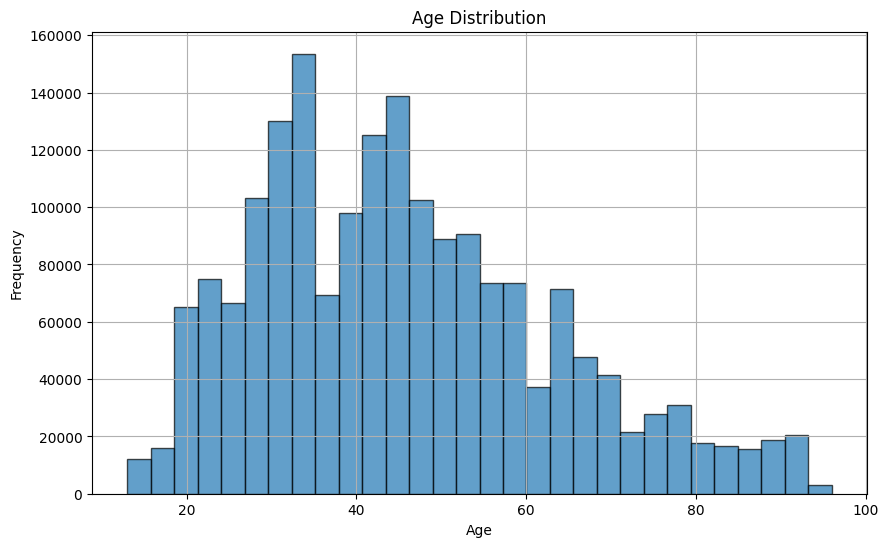

In [6]:
# Plot the age distribution (year(trans_date_trans_time in years - dob))
# Ensure 'trans_date_trans_time' and 'dob' are in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Calculate age
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year - (
    (df['trans_date_trans_time'].dt.month < df['dob'].dt.month) |
    ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & (df['trans_date_trans_time'].dt.day < df['dob'].dt.day))
)

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [7]:
age_description = df['age'].describe()
age_description_formatted = age_description.apply(lambda x: f'{x:.2f}')

print(age_description_formatted)

count    1852394.00
mean          45.76
std           17.41
min           13.00
25%           32.00
50%           44.00
75%           57.00
max           96.00
Name: age, dtype: object


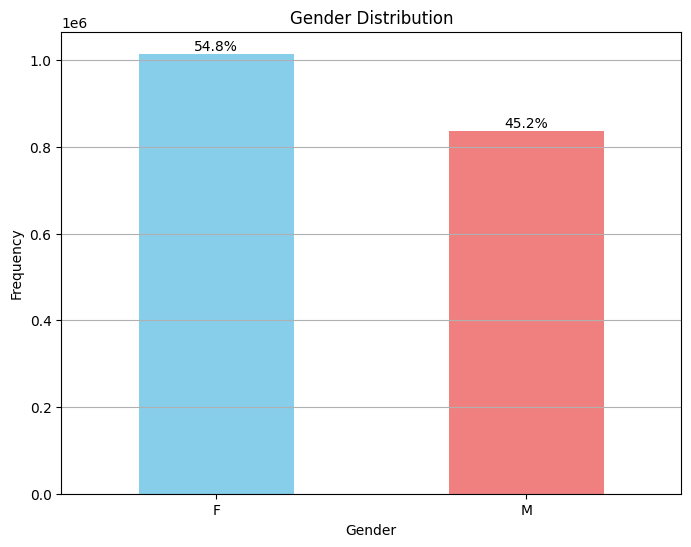

In [8]:
import matplotlib.pyplot as plt

# Plot Gender distribution
plt.figure(figsize=(8, 6))
gender_counts = df['gender'].value_counts()
ax = gender_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Calculate total count for percentages
total = gender_counts.sum()

# Annotate bars with percentages
for i, count in enumerate(gender_counts):
    percentage = f'{100 * count / total:.1f}%'
    ax.text(i, count + 0.05, percentage, ha='center', va='bottom')

plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

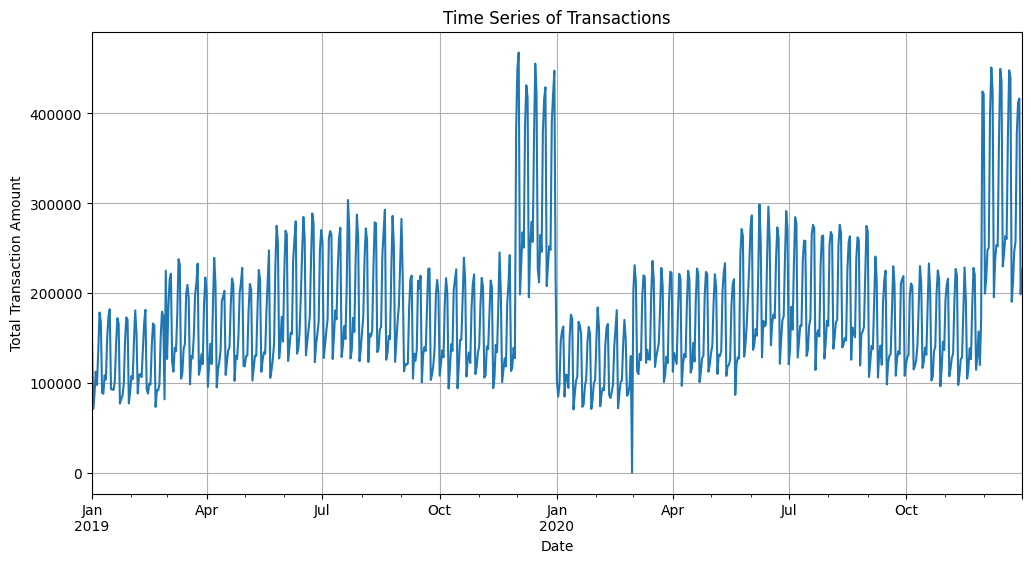

In [9]:
# Plot the times series of transactions
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

plt.figure(figsize=(12, 6))
df.set_index('trans_date_trans_time')['amt'].resample('D').sum().plot()
plt.title('Time Series of Transactions')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

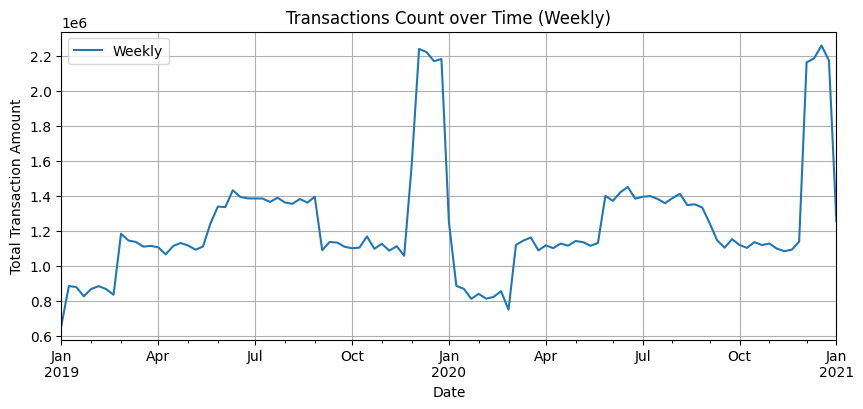

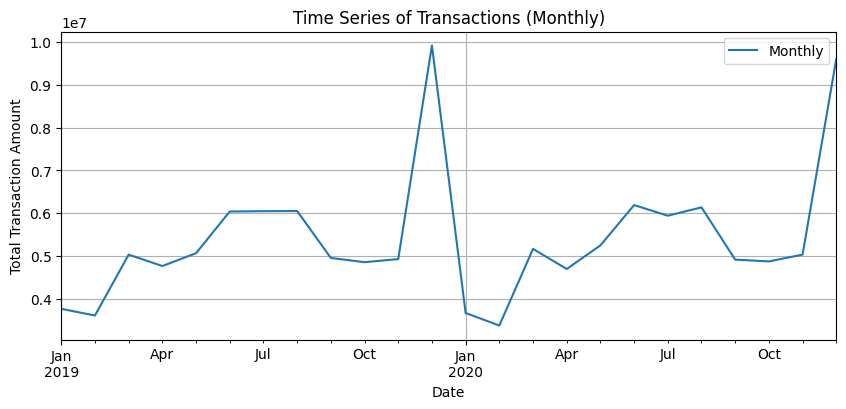

In [10]:
# Plot the time series of transactions in bins of weeks
plt.figure(figsize=(10, 4))
df.set_index('trans_date_trans_time')['amt'].resample('W').sum().plot(label='Weekly')
plt.title('Transactions Count over Time (Weekly)')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.legend()
plt.show()

# Plot the time series of transactions in bins of months
plt.figure(figsize=(10, 4))
df.set_index('trans_date_trans_time')['amt'].resample('M').sum().plot(label='Monthly')
plt.title('Time Series of Transactions (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.legend()
plt.show()

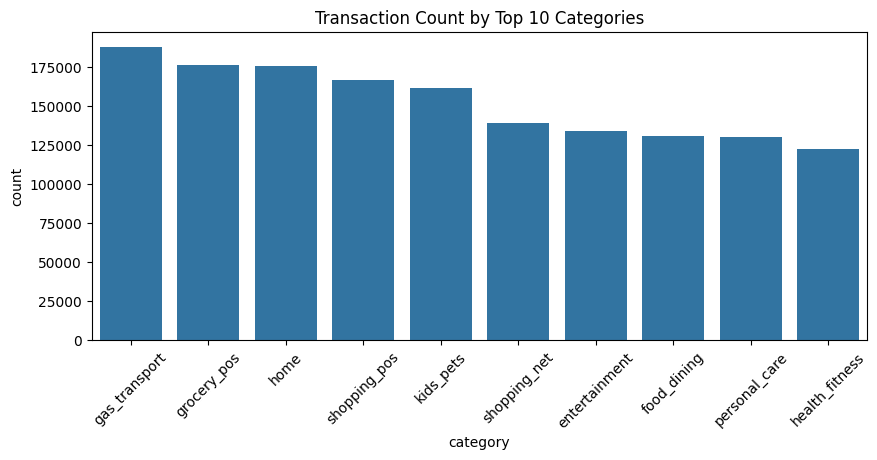

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 categories
top_10_categories = df['category'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 categories
df_top_10 = df[df['category'].isin(top_10_categories)]

# Plot bar chart for 'category'
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df_top_10, x='category', order=top_10_categories)
plt.title('Transaction Count by Top 10 Categories')
plt.xticks(rotation=45)
plt.show()

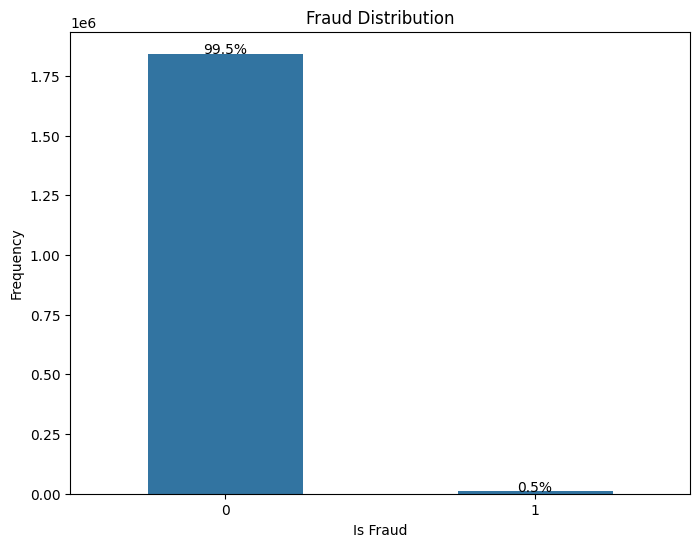

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Fraud Distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='is_fraud', width=0.5)  # Adjust the width parameter
plt.title('Fraud Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Calculate percentages
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

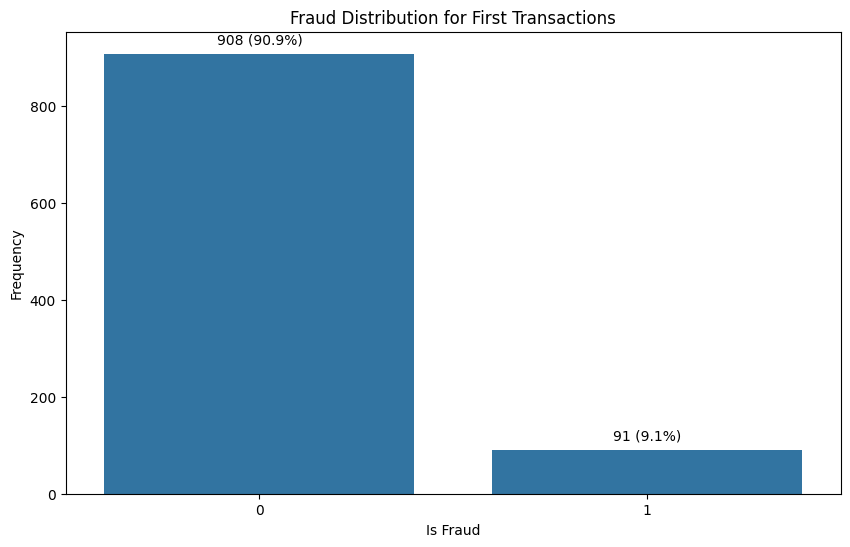

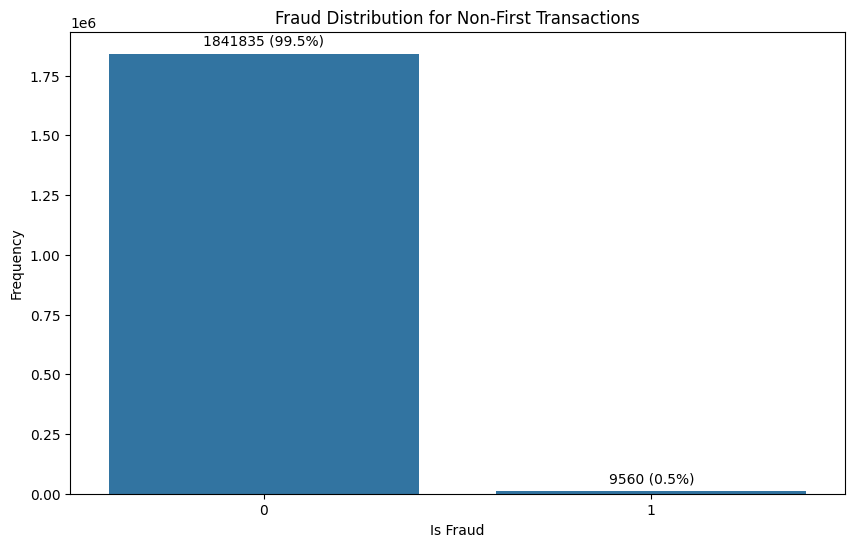

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataframe by 'unix_time' to ensure the first transaction is correctly identified
df_sorted = df.sort_values(by='unix_time')

# Identify the first transaction for each card using 'cc_num'
df_sorted['is_first_transaction'] = ~df_sorted.duplicated(subset='cc_num', keep='first')

# Separate the data into first transactions and non-first transactions
first_transactions = df_sorted[df_sorted['is_first_transaction']]
non_first_transactions = df_sorted[~df_sorted['is_first_transaction']]

# Function to add counts and percentages on bars
def add_counts_and_percentages(ax, data):
    total = len(data)
    for p in ax.patches:
        count = int(p.get_height())
        percentage = f'{100 * count / total:.1f}%'
        ax.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height() + 0.02 * total), ha='center', va='baseline', fontsize=10)

# Plot Fraud Distribution for first transactions
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=first_transactions, x='is_fraud')
plt.title('Fraud Distribution for First Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
add_counts_and_percentages(ax, first_transactions)

plt.show()

# Plot Fraud Distribution for non-first transactions
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=non_first_transactions, x='is_fraud')
plt.title('Fraud Distribution for Non-First Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
add_counts_and_percentages(ax, non_first_transactions)

plt.show()

category
shopping_net      1.592713
misc_net          1.303859
grocery_pos       1.264537
shopping_pos      0.634375
gas_transport     0.410575
misc_pos          0.281890
grocery_net       0.269737
travel            0.269170
personal_care     0.222931
entertainment     0.217719
kids_pets         0.187971
food_dining       0.156813
home              0.151032
health_fitness    0.150955
Name: is_fraud, dtype: float64


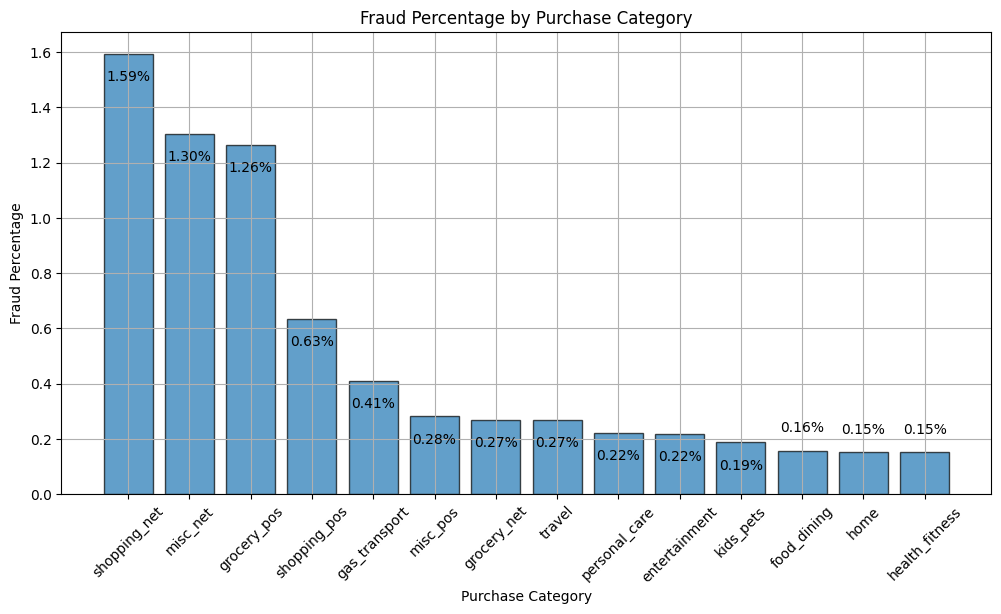

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has 'category' and 'is_fraud' columns

# Calculate the fraud percentage for each purchase category
fraud_percentage_by_category = df.groupby('category')['is_fraud'].mean() * 100
fraud_percentage_by_category = fraud_percentage_by_category.sort_values(ascending=False)

# Print the result
print(fraud_percentage_by_category)

# Plot the fraud percentage for each purchase category
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_percentage_by_category.index, fraud_percentage_by_category.values, edgecolor='k', alpha=0.7)
plt.title('Fraud Percentage by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Fraud Percentage')
plt.xticks(rotation=45)
plt.grid(True)

# Add percentage labels on each bar
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{yval:.2f}%', ha='center', va='center', color='black')

plt.show()

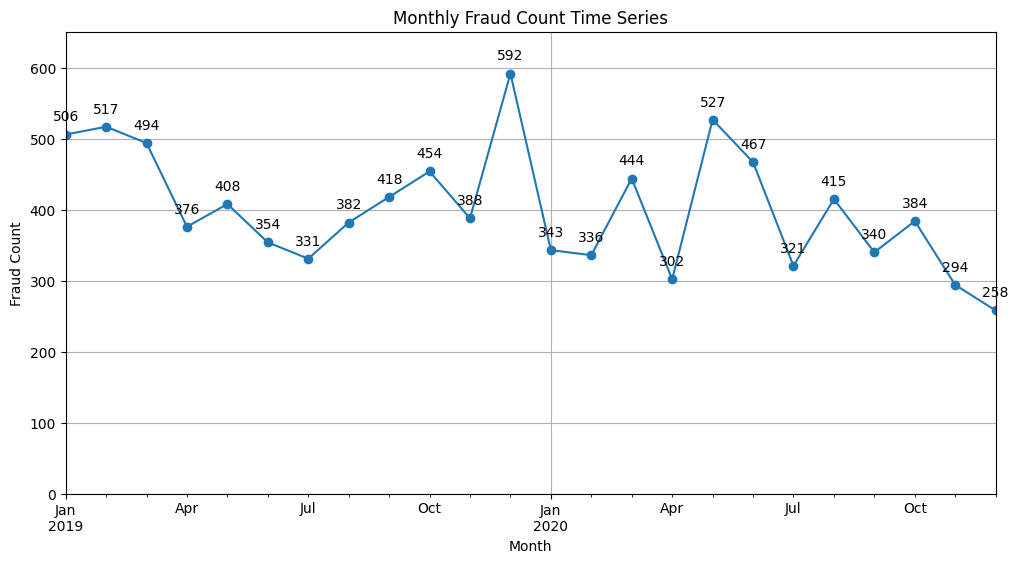

In [15]:
# Ensure 'trans_date_trans_time' is in datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Create a new column for the month and year
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')

# Group by the new 'year_month' column and count the number of frauds
fraud_counts = df[df['is_fraud'] == 1].groupby('year_month').size()

# Plot the fraud count time series
plt.figure(figsize=(12, 6))
ax = fraud_counts.plot(kind='line', marker='o')
plt.title('Monthly Fraud Count Time Series')
plt.xlabel('Month')
plt.ylabel('Fraud Count')
plt.grid(True)

# Add number labels on each point
for x, y in zip(fraud_counts.index, fraud_counts.values):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust the y-axis limit to make space for labels
plt.ylim(0, fraud_counts.max() * 1.1)

plt.show()

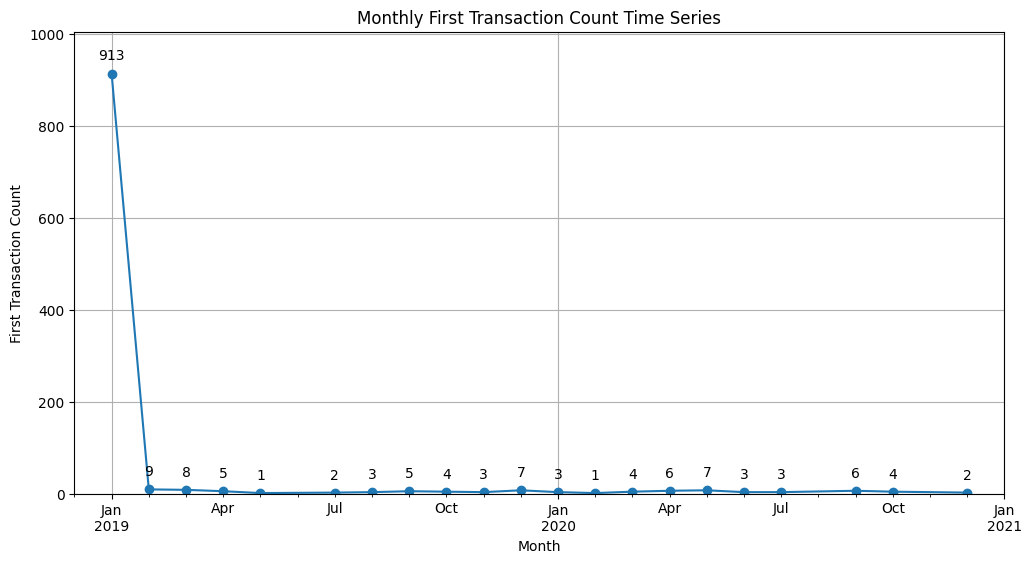

In [16]:
# Sort the dataframe by 'trans_date_trans_time' to ensure the first transaction is correctly identified
df_sorted = df.sort_values(by='trans_date_trans_time')

# Identify the first transaction for each card using 'cc_num'
df_sorted['is_first_transaction'] = ~df_sorted.duplicated(subset='cc_num', keep='first')

# Create a new column for the month and year
df_sorted['year_month'] = df_sorted['trans_date_trans_time'].dt.to_period('M')

# Group by the new 'year_month' column and count the number of first transactions
first_transaction_counts = df_sorted[df_sorted['is_first_transaction'] == True].groupby('year_month').size()

# Plot the first transaction count time series
plt.figure(figsize=(12, 6))
ax = first_transaction_counts.plot(kind='line', marker='o')
plt.title('Monthly First Transaction Count Time Series')
plt.xlabel('Month')
plt.ylabel('First Transaction Count')
plt.grid(True)

# Add number labels on each point
for x, y in zip(first_transaction_counts.index, first_transaction_counts.values):
    ax.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

# Adjust the y-axis limit to make space for labels
plt.ylim(0, first_transaction_counts.max() * 1.1)

# Adjust the x-axis limit to ensure the first point label is visible
plt.xlim(first_transaction_counts.index.min() - 1, first_transaction_counts.index.max() + 1)

plt.show()

/var/folders/69/msdphlm56791c06wfjlc53n80000gn/T/ipykernel_50262/682821968.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age_bin = df[df['is_fraud'] == 1].groupby('age_bin').size()
/var/folders/69/msdphlm56791c06wfjlc53n80000gn/T/ipykernel_50262/682821968.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_by_age_bin = df.groupby('age_bin').size()
posx and posy should be finite values
posx and posy should be finite values


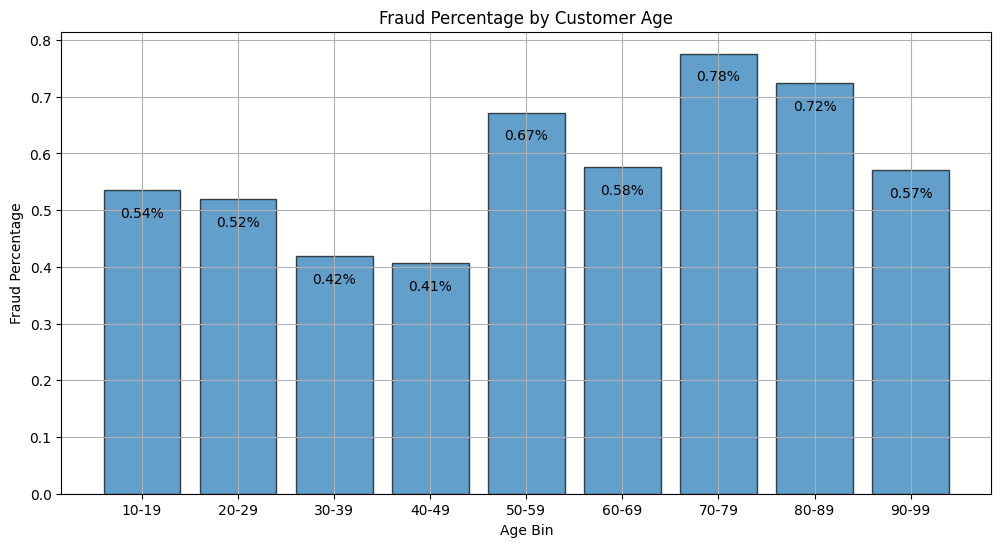

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'age' and 'is_fraud' columns

# Create age bins with a bin width of 10 years
bins = range(0, df['age'].max() + 10, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_bin' and count the number of fraud cases
fraud_by_age_bin = df[df['is_fraud'] == 1].groupby('age_bin').size()

# Group by 'age_bin' and count the total number of transactions
total_by_age_bin = df.groupby('age_bin').size()

# Calculate the percentage of fraud cases for each age bin
fraud_percentage_by_age_bin = (fraud_by_age_bin / total_by_age_bin) * 100

# Plot the fraud percentage by age bin
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_percentage_by_age_bin.index, fraud_percentage_by_age_bin.values, edgecolor='k', alpha=0.7)
plt.title('Fraud Percentage by Customer Age')
plt.xlabel('Age Bin')
plt.ylabel('Fraud Percentage')
plt.grid(True)

# Add percentage labels on each bar
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{yval:.2f}%', ha='center', va='center', color='black')

plt.show()

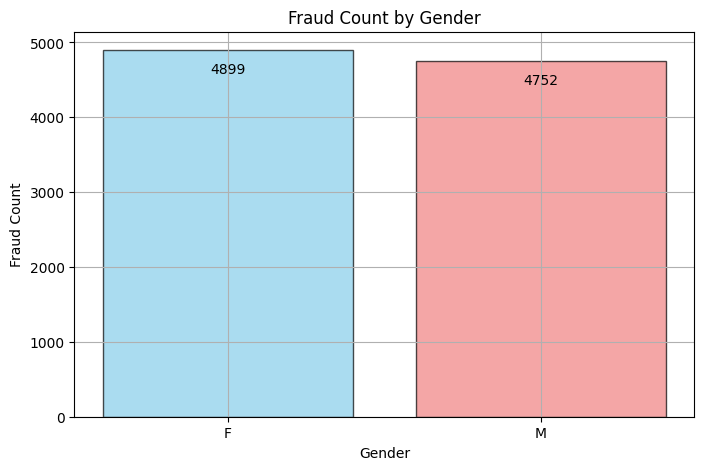

In [18]:
# Fraud by gender
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'gender' and 'is_fraud' columns

# Group by 'gender' and count the number of fraud cases
fraud_by_gender = df[df['is_fraud'] == 1].groupby('gender').size()

# Plot the fraud count by gender
plt.figure(figsize=(8, 5))
bars = plt.bar(fraud_by_gender.index, fraud_by_gender.values, color=['skyblue', 'lightcoral'], edgecolor='k', alpha=0.7)
plt.title('Fraud Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Count')
plt.grid(True)

# Add number labels on each bar
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{int(yval)}', ha='center', va='center', color='black')

plt.show()

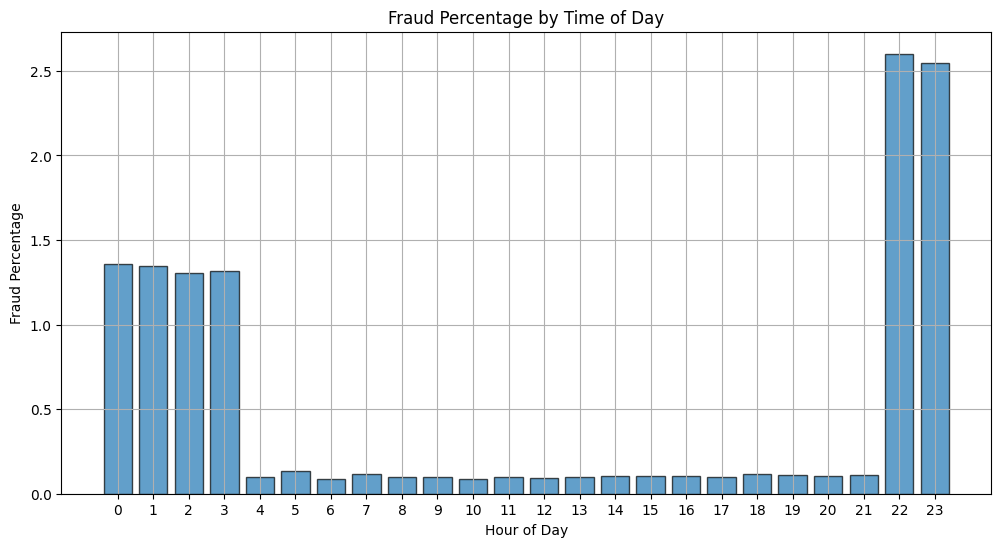

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'trans_date_trans_time' and 'is_fraud' columns

# Convert 'trans_date_trans_time' to datetime if it's not already
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract the hour from the 'trans_date_trans_time' column
df['hour'] = df['trans_date_trans_time'].dt.hour

# Group by 'hour' and count the number of fraud cases
fraud_by_hour = df[df['is_fraud'] == 1].groupby('hour').size()

# Group by 'hour' and count the total number of transactions
total_by_hour = df.groupby('hour').size()

# Calculate the percentage of fraud cases for each hour
fraud_percentage_by_hour = (fraud_by_hour / total_by_hour) * 100

# Plot the fraud percentage by hour
plt.figure(figsize=(12, 6))
bars = plt.bar(fraud_percentage_by_hour.index, fraud_percentage_by_hour.values, edgecolor='k', alpha=0.7)
plt.title('Fraud Percentage by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Percentage')
plt.xticks(range(0, 24))  # Set x-ticks to represent each hour
plt.grid(True)
plt.show()

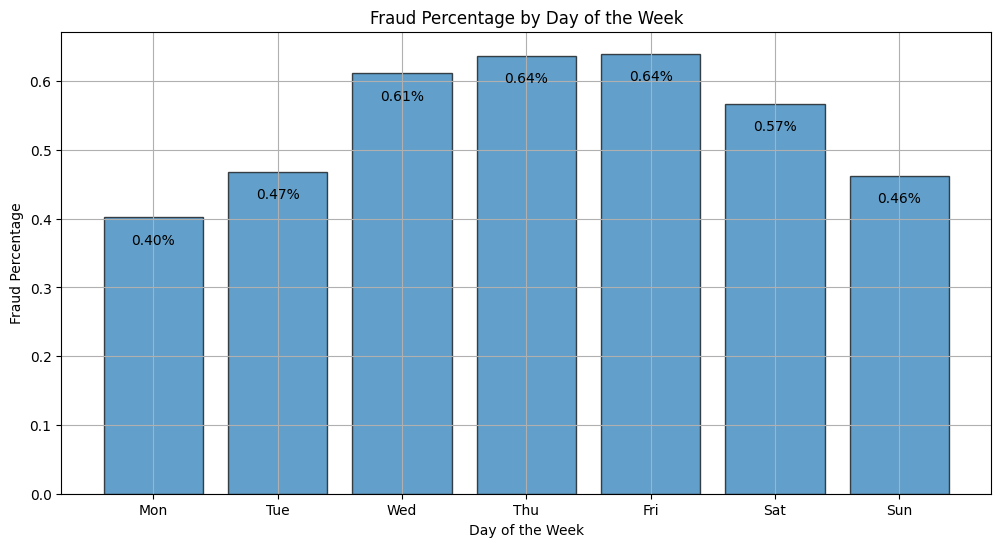

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has 'trans_date_trans_time' and 'is_fraud' columns

# Convert 'trans_date_trans_time' to datetime if it's not already
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract the day of the week from the 'trans_date_trans_time' column
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6

# Group by 'day_of_week' and count the number of fraud cases
fraud_by_day_of_week = df[df['is_fraud'] == 1].groupby('day_of_week').size()

# Group by 'day_of_week' and count the total number of transactions
total_by_day_of_week = df.groupby('day_of_week').size()

# Calculate the percentage of fraud cases for each day of the week
fraud_percentage_by_day_of_week = (fraud_by_day_of_week / total_by_day_of_week) * 100

# Plot the fraud percentage by day of the week
plt.figure(figsize=(12, 6))
bars_day = plt.bar(fraud_percentage_by_day_of_week.index, fraud_percentage_by_day_of_week.values, edgecolor='k', alpha=0.7)
plt.title('Fraud Percentage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Fraud Percentage')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)

# Add percentage labels on each bar
ax = plt.gca()
ylim = ax.get_ylim()
for bar in bars_day:
    yval = bar.get_height()
    label_position = yval - (ylim[1] * 0.05) if yval > (ylim[1] * 0.1) else yval + (ylim[1] * 0.05)
    plt.text(bar.get_x() + bar.get_width()/2, label_position, f'{yval:.2f}%', ha='center', va='center', color='black')

plt.show()